In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
nw = pd.read_csv('new_nw.csv',encoding = 'unicode_escape')

In [6]:
nw

,year,category,prize,motivation,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,01-03-1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,07-09-1907,Chtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,31-03-1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,30-10-1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,463,Individual,Frdric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,12-06-1912,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1,Individual,Wilhelm Conrad Rntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,10-02-1923,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,15-07-1919,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,01-11-1903,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,16-09-1932,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,464,Individual,lie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,07-12-1906,Bern,Switzerland


In [7]:
nw.dropna(how='any',subset=['birth_date',], inplace=True)
nw = nw[nw.birth_date!= '0000/00/00']

In [8]:
nw['age_at_prize'] = nw.year.values-nw.birth_date.apply(lambda x: x.split('-')[-3]).values.astype(float)+1

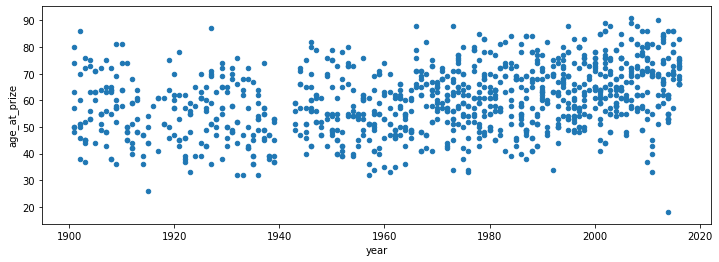

In [9]:
fig,ax=plt.subplots()
nw.groupby('category').plot.scatter(x='year',y='age_at_prize', figsize=[12,4],ax=ax);

In [13]:
import seaborn as sns
golden = (1 + 5 ** 0.5) / 2

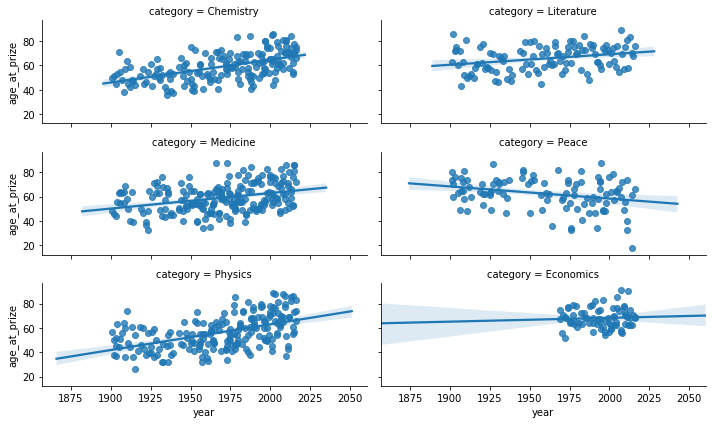

In [14]:
g = sns.FacetGrid(nw, col="category", col_wrap=2, size=2, aspect=2.5 ,sharex=True, sharey=True)
g.map(sns.regplot,"year","age_at_prize")

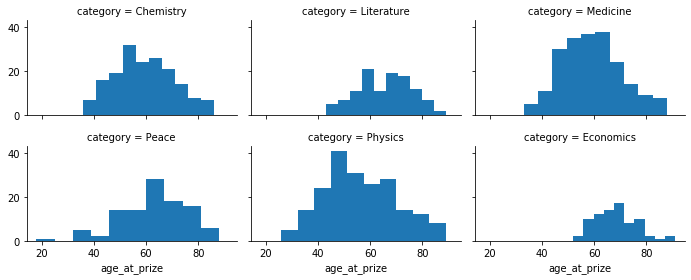

In [15]:
g = sns.FacetGrid(nw, col="category", col_wrap=3, size=2, aspect=golden)
g.map(plt.hist, "age_at_prize");

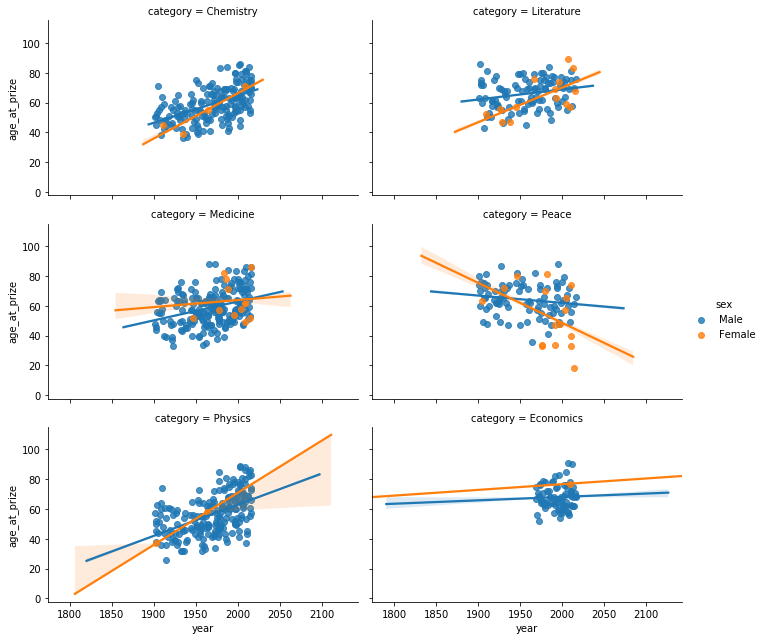

In [17]:
g = sns.lmplot(x="year", y="age_at_prize", col="category", hue="sex", data=nw,ci=25,order=1,
               col_wrap=2, size=3, aspect=golden, sharex=True)